| Device      | Name                      | Model         |
| :---        |           :----:          |          ---: |
| D1          | Xiaomi Redmi Note 10 Pro  |  M2101K6G     |
| D2          | Xiaomi Redmi 9            | M2004J19C     |
| D3          | Nokia 5.1 Plus            | -     |
| D4          |  Nokia 2.3                | -     |

In [26]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
horizontal_length = 16
vertical_length = 16
plt.figure(figsize=(horizontal_length, vertical_length))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

# open3feet

### D3 to D4

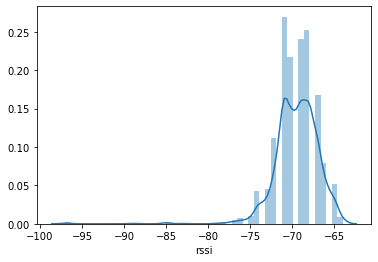

In [3]:
path_d3tod4 = './dataset/open3feet/floor/D3_to_D4.csv'
df_d3tod4 = pd.read_csv(path_d3tod4)
open3feet_d3tod4 = df_d3tod4['rssi']
sns.distplot(open3feet_d3tod4)
plt.show()

In [4]:
open3feet_d3tod4.shape

(1685,)

In [5]:
open3feet_d3tod4.median()

-69.0

### D4 to D3

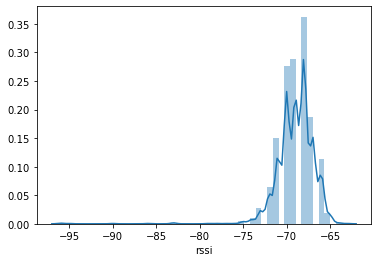

In [6]:
path_d4tod3 = './dataset/open3feet/floor/D4_to_D3.csv'
df_d4tod3 = pd.read_csv(path_d4tod3)
open3feet_d4tod3 = df_d4tod3['rssi']
sns.distplot(open3feet_d4tod3)
plt.show()

In [7]:
open3feet_d4tod3.shape

(2207,)

In [8]:
open3feet_d4tod3.median()

-69.0

# open9feet

### D3 to D4

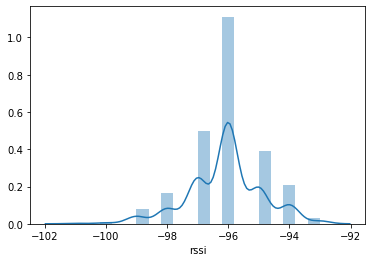

In [9]:
path_d3tod4 = './dataset/open9feet/floor/D3_to_D4.csv'
df_d3tod4 = pd.read_csv(path_d3tod4)
open9feet_d3tod4 = df_d3tod4['rssi']
sns.distplot(open9feet_d3tod4)
plt.show()

In [10]:
open9feet_d3tod4.shape

(954,)

In [11]:
open9feet_d3tod4.median()

-96.0

### D4 to D3

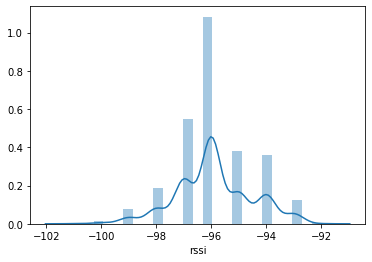

In [12]:
path_d4tod3 = './dataset/open9feet/floor/D4_to_D3.csv'
df_d4tod3 = pd.read_csv(path_d4tod3)
open9feet_d4tod3 = df_d4tod3['rssi']
sns.distplot(open9feet_d4tod3)
plt.show()

In [13]:
open9feet_d4tod3.shape

(1365,)

In [14]:
open9feet_d4tod3.median()

-96.0

# wall3feet

# wall9feet

# Prepare Dataset

In [15]:
dataset_open3feet = pd.DataFrame()
dataset_open3feet['rssi'] = open3feet_d3tod4
dataset_open3feet['target'] = 1

In [16]:
temp = pd.DataFrame()
temp['rssi'] = open3feet_d4tod3
temp['target'] = 1

In [17]:
dataset_open3feet = dataset_open3feet.append(temp)
dataset_open3feet.reset_index(drop=True, inplace=True)

In [18]:
dataset_open3feet

,rssi,target
0,-66,1
1,-66,1
2,-64,1
3,-69,1
4,-67,1
...,...,...
3887,-68,1
3888,-72,1
3889,-72,1
3890,-70,1


In [19]:
dataset_open9feet = pd.DataFrame()
dataset_open9feet['rssi'] = open9feet_d3tod4
dataset_open9feet['target'] = 0

In [20]:
temp = pd.DataFrame()
temp['rssi'] = open9feet_d4tod3
temp['target'] = 0

In [21]:
dataset_open9feet = dataset_open9feet.append(temp)
dataset_open9feet.reset_index(drop=True, inplace=True)

In [22]:
dataset_open9feet

,rssi,target
0,-94,0
1,-98,0
2,-97,0
3,-96,0
4,-96,0
...,...,...
2314,-98,0
2315,-96,0
2316,-98,0
2317,-97,0


In [23]:
dataset = dataset_open3feet.append(dataset_open9feet)
dataset.reset_index(drop=True, inplace=True)

In [24]:
dataset

,rssi,target
0,-66,1
1,-66,1
2,-64,1
3,-69,1
4,-67,1
...,...,...
6206,-98,0
6207,-96,0
6208,-98,0
6209,-97,0


In [29]:
dataset = shuffle(dataset)
dataset.reset_index(drop=True, inplace=True)

In [30]:
dataset

,rssi,target
0,-68,1
1,-70,1
2,-74,1
3,-95,0
4,-95,0
...,...,...
6206,-95,0
6207,-66,1
6208,-96,0
6209,-69,1


In [31]:
dataset.to_csv("rssi_dataset_1.csv")